# Different Optimization Methods

In [1]:
# As usual, a bit of setup
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt
from utils.classifiers.fc_net import *
from utils.data_utils import get_CIFAR10_data
from utils.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in list(data.items()):
  print(('%s: ' % k, v.shape))

('X_train: ', (49000, 3, 32, 32))
('y_train: ', (49000,))
('X_val: ', (1000, 3, 32, 32))
('y_val: ', (1000,))
('X_test: ', (1000, 3, 32, 32))
('y_test: ', (1000,))


# Update rules
More sophisticated update rules can make it easier to train deep networks. We will implement a few of the most commonly used update rules and compare them to vanilla SGD.

# SGD & SGD+Momentum
Stochastic gradient descent with momentum is a widely used update rule that tends to make deep networks converge faster than vanilla stochstic gradient descent.


running with  sgd
(Iteration 1 / 200) loss: 2.481137
(Epoch 0 / 5) train acc: 0.111000; val_acc: 0.129000
(Iteration 11 / 200) loss: 2.168358
(Iteration 21 / 200) loss: 2.090402
(Iteration 31 / 200) loss: 2.089255
(Epoch 1 / 5) train acc: 0.264000; val_acc: 0.249000
(Iteration 41 / 200) loss: 1.983093
(Iteration 51 / 200) loss: 1.926810
(Iteration 61 / 200) loss: 1.856079
(Iteration 71 / 200) loss: 1.910583
(Epoch 2 / 5) train acc: 0.324000; val_acc: 0.289000
(Iteration 81 / 200) loss: 1.770488
(Iteration 91 / 200) loss: 1.860704
(Iteration 101 / 200) loss: 1.781648
(Iteration 111 / 200) loss: 1.727764
(Epoch 3 / 5) train acc: 0.367000; val_acc: 0.286000
(Iteration 121 / 200) loss: 1.652527
(Iteration 131 / 200) loss: 1.768947
(Iteration 141 / 200) loss: 1.692691
(Iteration 151 / 200) loss: 1.717368
(Epoch 4 / 5) train acc: 0.446000; val_acc: 0.327000
(Iteration 161 / 200) loss: 1.596321
(Iteration 171 / 200) loss: 1.782497
(Iteration 181 / 200) loss: 1.532467
(Iteration 191 / 200) los

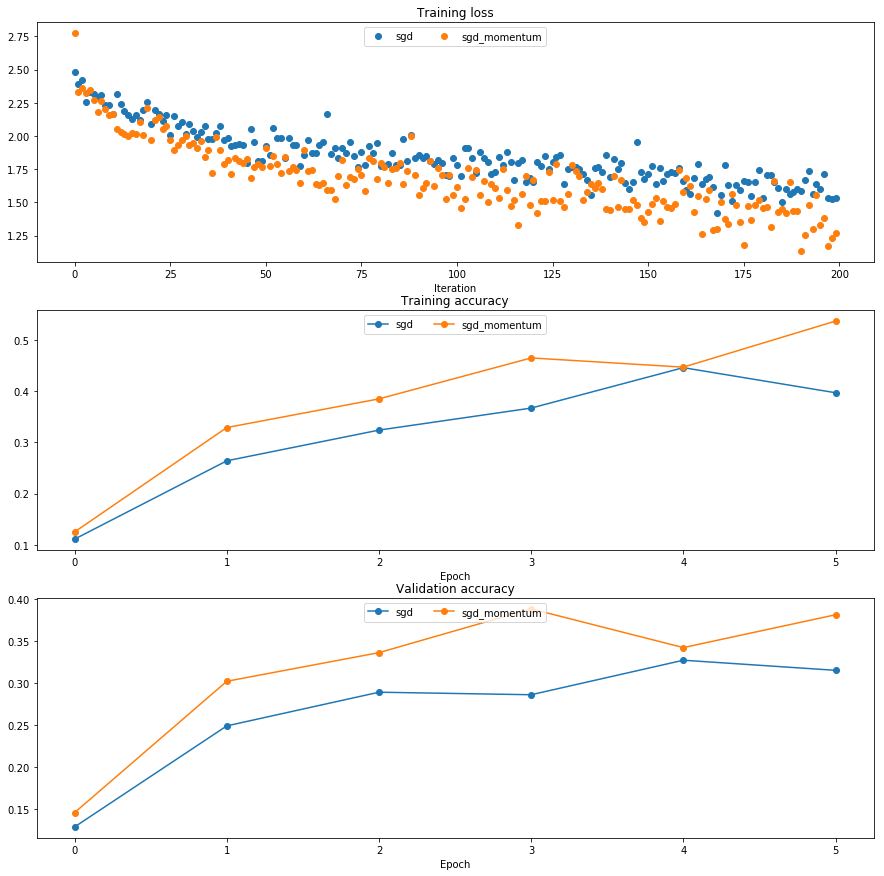

In [3]:
num_train = 4000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

solvers = {}

for update_rule in ['sgd', 'sgd_momentum']:
  print('running with ', update_rule)
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

  solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': 1e-2,
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in list(solvers.items()):
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, 'o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

# AdaMax and AdaGrad

running with  adagrad
(Iteration 1 / 200) loss: 2.592610
(Epoch 0 / 5) train acc: 0.135000; val_acc: 0.125000
(Iteration 11 / 200) loss: 2.108296
(Iteration 21 / 200) loss: 1.897329
(Iteration 31 / 200) loss: 1.975599
(Epoch 1 / 5) train acc: 0.374000; val_acc: 0.294000
(Iteration 41 / 200) loss: 1.920631
(Iteration 51 / 200) loss: 1.686834
(Iteration 61 / 200) loss: 1.802033
(Iteration 71 / 200) loss: 1.773816
(Epoch 2 / 5) train acc: 0.451000; val_acc: 0.319000
(Iteration 81 / 200) loss: 1.623234
(Iteration 91 / 200) loss: 1.603590
(Iteration 101 / 200) loss: 1.613900
(Iteration 111 / 200) loss: 1.742852
(Epoch 3 / 5) train acc: 0.473000; val_acc: 0.334000
(Iteration 121 / 200) loss: 1.457563
(Iteration 131 / 200) loss: 1.400897
(Iteration 141 / 200) loss: 1.475782
(Iteration 151 / 200) loss: 1.624323
(Epoch 4 / 5) train acc: 0.487000; val_acc: 0.353000
(Iteration 161 / 200) loss: 1.528047
(Iteration 171 / 200) loss: 1.491197
(Iteration 181 / 200) loss: 1.489907
(Iteration 191 / 200)

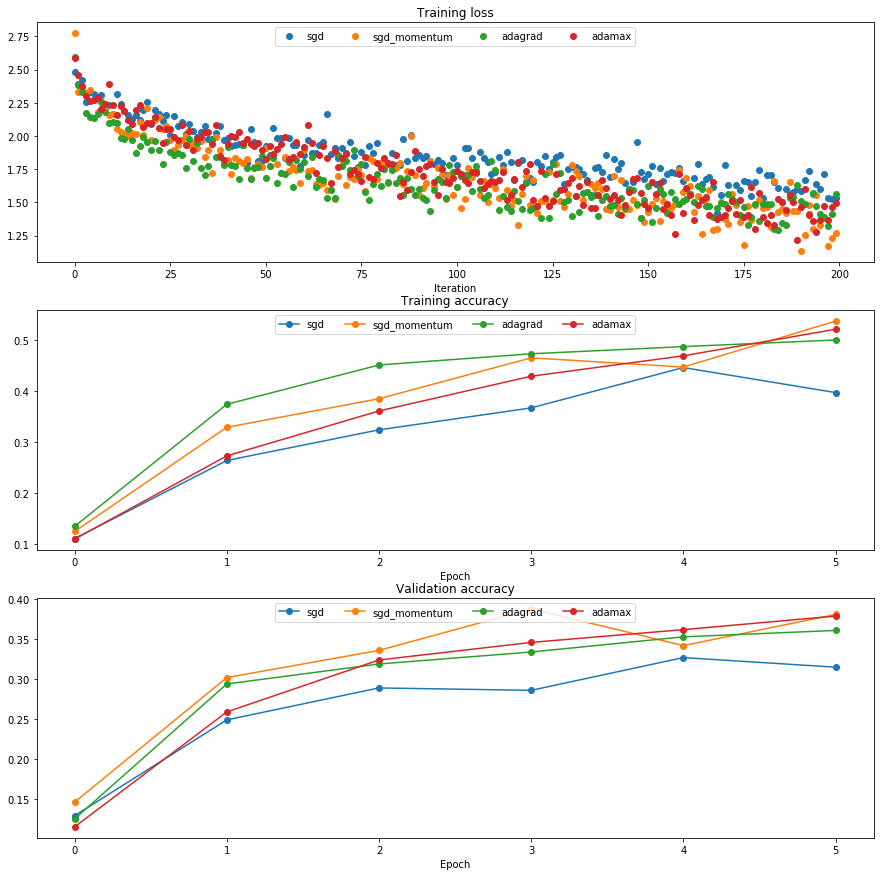

In [4]:
learning_rates = {'adagrad': 1e-3, 'adamax': 3e-3}
for update_rule in ['adagrad', 'adamax']:
  print('running with ', update_rule)
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

  solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in list(solvers.items()):
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, 'o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

# Adadelta and NAdam

running with  adadelta
(Iteration 1 / 200) loss: 2.452109
(Epoch 0 / 5) train acc: 0.117000; val_acc: 0.161000
(Iteration 11 / 200) loss: 2.121605
(Iteration 21 / 200) loss: 2.040029
(Iteration 31 / 200) loss: 1.829421
(Epoch 1 / 5) train acc: 0.354000; val_acc: 0.327000
(Iteration 41 / 200) loss: 1.701860
(Iteration 51 / 200) loss: 1.744713
(Iteration 61 / 200) loss: 1.540165
(Iteration 71 / 200) loss: 1.591468
(Epoch 2 / 5) train acc: 0.433000; val_acc: 0.341000
(Iteration 81 / 200) loss: 1.503184
(Iteration 91 / 200) loss: 1.725143
(Iteration 101 / 200) loss: 1.604229
(Iteration 111 / 200) loss: 1.480014
(Epoch 3 / 5) train acc: 0.455000; val_acc: 0.337000
(Iteration 121 / 200) loss: 1.473486
(Iteration 131 / 200) loss: 1.489196
(Iteration 141 / 200) loss: 1.482156
(Iteration 151 / 200) loss: 1.338264
(Epoch 4 / 5) train acc: 0.533000; val_acc: 0.360000
(Iteration 161 / 200) loss: 1.158707
(Iteration 171 / 200) loss: 1.329791
(Iteration 181 / 200) loss: 1.356308
(Iteration 191 / 200

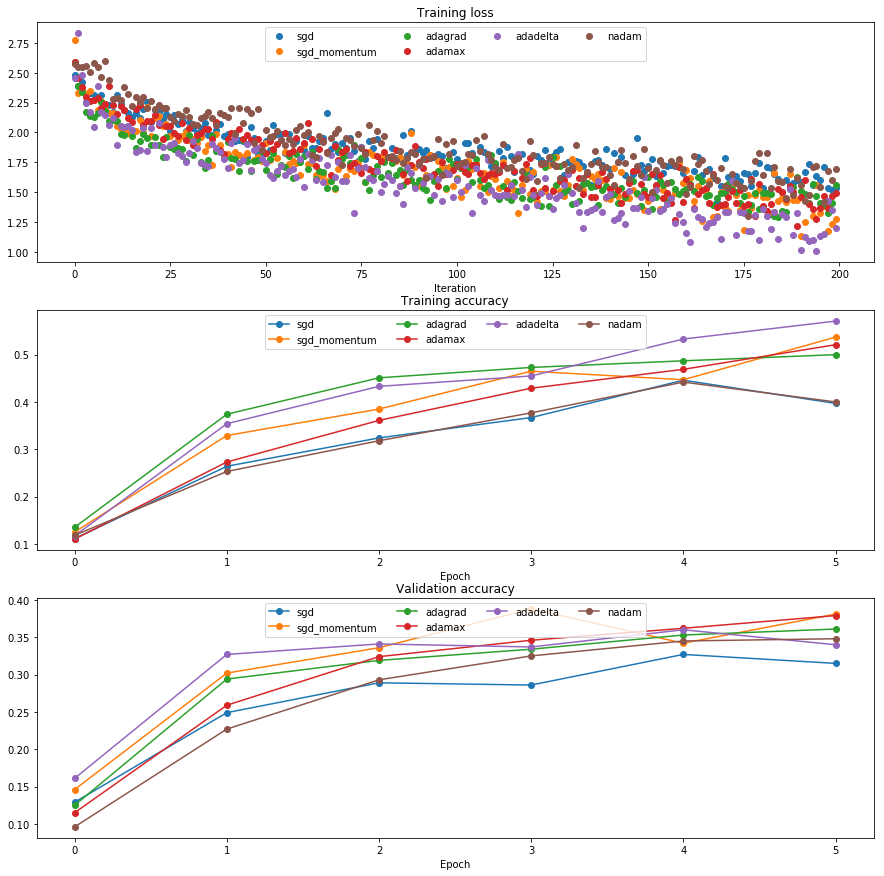

In [5]:
learning_rates = {'adadelta': 1, 'nadam': 1e-3}
for update_rule in ['adadelta', 'nadam']:
  print('running with ', update_rule)
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

  solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in list(solvers.items()):
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, 'o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()


# RMSProp and Adam
RMSProp [1] and Adam [2] are update rules that set per-parameter learning rates by using a running average of the second moments of gradients.

[1] Tijmen Tieleman and Geoffrey Hinton. "Lecture 6.5-rmsprop: Divide the gradient by a running average of its recent magnitude." COURSERA: Neural Networks for Machine Learning 4 (2012).

[2] Diederik Kingma and Jimmy Ba, "Adam: A Method for Stochastic Optimization", ICLR 2015.

In [ ]:
learning_rates = {'rmsprop': 1e-4, 'adam': 1e-3}
for update_rule in ['adam', 'rmsprop']:
  print('running with ', update_rule)
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

  solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in list(solvers.items()):
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, 'o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

running with  adam
(Iteration 1 / 200) loss: 2.689595
(Epoch 0 / 5) train acc: 0.149000; val_acc: 0.142000
(Iteration 11 / 200) loss: 2.116268
(Iteration 21 / 200) loss: 1.960287
(Iteration 31 / 200) loss: 1.828609
(Epoch 1 / 5) train acc: 0.362000; val_acc: 0.306000
(Iteration 41 / 200) loss: 1.981401
